In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

#load dataset into numpy arrays
train_path = './dataset/train_data_fix.csv'
test_path = './dataset/test_data_fix.csv'
train_data = np.loadtxt(train_path, delimiter=',', skiprows=1)
val_data = np.loadtxt(test_path, delimiter=',', skiprows=1)

#Separate data into features and labels
x = train_data[:, :-1]
y = train_data[:, -1]

#split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Prepare data for LightGBM
train_data_lgb = lgb.Dataset(x_train, label=y_train)
test_data_lgb = lgb.Dataset(x_test, label=y_test, reference=train_data_lgb)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train model
model = lgb.train(params, train_data_lgb, valid_sets=test_data_lgb, num_boost_round=1000)

# Make predictions on the validation data
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Make predictions on test set
y_pred_test_lgb = model.predict(val_data, num_iteration=model.best_iteration)

# Print result
rmse , y_pred_test_lgb[:5]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1121
[LightGBM] [Info] Number of data points in the train set: 43200, number of used features: 17
[LightGBM] [Info] Start training from score 38.140069


(24.148855190191185,
 array([127.39271698, 173.4958021 , 208.51303378,  87.73307348,
        165.29725625]))

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Set parameters for Random Forest
params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 10,
    'min_samples_leaf': 5,
    'random_state': 42,
}

# Train model
model_rf= RandomForestRegressor(**params)
model_rf.fit(x_train, y_train)

# Make predictions on the validation data
y_pred = model_rf.predict(x_test)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))

# Make predictions on test set
y_pred_test_rf = model.predict(val_data)

# Print result
rmse_rf , y_pred_test_rf[:5]

(53.691447940486185,
 array([127.39271698, 173.4958021 , 208.51303378,  87.73307348,
        165.29725625]))

AttributeError: type object 'RandomForestRegressor' has no attribute 'plot_importance'

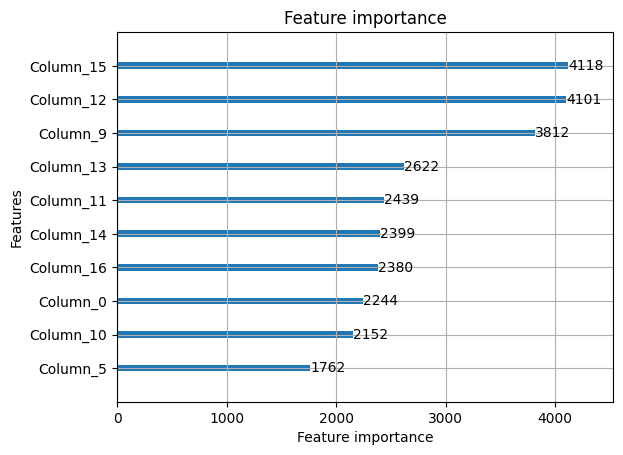

In [19]:
import matplotlib.pyplot as plt

#show feature importance
lgb.plot_importance(model, max_num_features=10)
RandomForestRegressor.plot_importance(model_rf, max_num_features=10)
plt.show()